## Testing Aksel's "native" geometry<br> Photon bomb at 380 nm<br> Using labppo and water

In [1]:
import ROOT, rat
import os, sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
sys.path.append('/home/jp/projects/snoplus/snoing/install/rat-dev/example/pyroot')
sys.path.append('/home/jp/projects/python_tools')
sys.path.append('/home/jp/projects/snoplus/python_modules')
import jp_mpl as jplot
import lowlevel_stats
reload(lowlevel_stats)

TClass::TClass:0: RuntimeWarning: no dictionary for class omtext is available


<module 'lowlevel_stats' from '/home/jp/projects/snoplus/python_modules/lowlevel_stats.pyc'>

In [2]:
outdir = '/home/jp/Dropbox/workflowy/snoplus/nativegeo_validation'

In [3]:
# Reading fcn
def readFile(one_dirname, fname):
    if one_dirname in data.keys():
        print 'This directory is already inside:', one_dirname
        print '... redoing only missing info'
    else:
        data[one_dirname] = {}
        
    file_name = os.path.join(basedir, one_dirname, fname)

    if not data[one_dirname].has_key('nhits'):
        data[one_dirname]['nhits'] = lowlevel_stats.getMChits(file_name)
    if not data[one_dirname].has_key('hit_t'):
        data[one_dirname]['hit_t'] = lowlevel_stats.getHitTimes_MC(file_name)
    if not data[one_dirname].has_key('pe_t'):
        data[one_dirname]['pe_t']  = lowlevel_stats.getPETimes_MC(file_name)
    
    # Getting the charges
    if not data[one_dirname].has_key('qtot'):
        snoqtot_aux, snoqpmt_aux, snoxpmt_aux= \
            lowlevel_stats.getPEcharge_light(file_name)
    
        data[one_dirname]['qtot'] = snoqtot_aux
        data[one_dirname]['qpmt'] = snoqpmt_aux
        data[one_dirname]['pexpmt'] = snoxpmt_aux

    return

In [4]:
# Initialize the data dictionary
data = {}

In [5]:
basedir = '/home/jp/projects/snoplus/rundir/nativegeo_verification/pbomb'

In [6]:
mycolors = ['b','r','g','m','c', 'y', '0.6']
def plotComparison(datasets = [], datakey = '', scale_factor = [], 
                   labels = [], figname = '', xaxis = np.arange(0, 100, 2),
                   xlabel = 'Nhits', ylabel = 'Entries'):

    if len(scale_factor) == 0:
        scale_factor = [1.]*len(datasets)
    if len(labels) == 0:
        labels = datasets
    # Reading each of the files one by one
    nbins = []
    myfig = plt.figure(figsize=(8,5))

    for i, one_set in enumerate(datasets):
        n, x = np.histogram(data[one_set][datakey], xaxis)
        nbins.append(n)
        print '\n',labels[i]

        print 'SUM ', data[one_set][datakey].sum()*scale_factor[i]
        print 'Mean ', data[one_set][datakey].mean()*scale_factor[i]
        print 'Std  ', data[one_set][datakey].std()*scale_factor[i]
        
        jplot.unfilledBar(xaxis, nbins[-1]*scale_factor[i], 
                              color = mycolors[i])
        jplot.errorMark(xaxis, nbins[-1]*scale_factor[i], 
                        error=np.sqrt(nbins[-1])*scale_factor[i], color=mycolors[i],
                        label =labels[i] + ' ' + \
                            '\nmean=' + "%.2f" % data[one_set][datakey].mean() +\
                            '\nstd=' + "%.2f" % data[one_set][datakey].std()) 
    

    
        
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    #plt.ylim([0,])
    plt.legend(loc=0,ncol=1)
    if len(figname) > 0:
        myfig.savefig(os.path.join(outdir, figname + '.png'), dpi=300)

### Using photon bomb

#### Scintillator comparisons

In [7]:
readFile('snoplusnative','pbomb380.root')

In [8]:
readFile('snoplus_simple','pbomb380.root')

In [25]:
readFile('snoplusnative_noropes','pbomb380.root')

This directory is already inside: snoplusnative_noropes
... redoing only missing info


In [9]:
readFile('snoplus','pbomb380.root')


snoplus_simple
SUM  374570.0
Mean  374.57
Std   18.3499618528

snoplusnative
SUM  370967.0
Mean  370.967
Std   18.0670947028

snoplus
SUM  360392.0
Mean  360.392
Std   18.6433992609

snoplusnative_noropes
SUM  376141.0
Mean  376.141
Std   18.2128284185


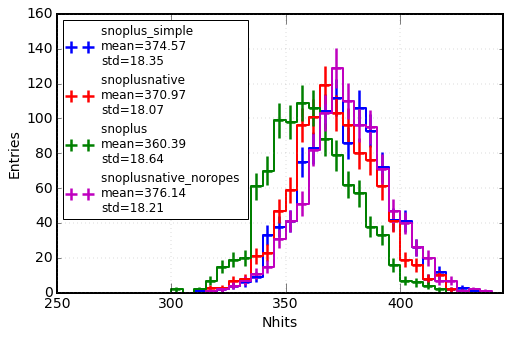

In [26]:
plotComparison(datasets = ['snoplus_simple', 'snoplusnative', 
                           'snoplus', 'snoplusnative_noropes'],
               datakey = 'nhits',
               scale_factor = [1.,1.,1., 1.],
               figname = 'PBomb380_nhit_native_vs_simple',
               xaxis = np.arange(250,450,5),
               xlabel = 'Nhits',
               ylabel = 'Entries')


snoplus_simple
SUM  11871042.0299
Mean  11871.0420299
Std   884.296458556

snoplusnative
SUM  11771935.6127
Mean  11771.9356127
Std   864.101264532

snoplus
SUM  11439201.2772
Mean  11439.2012772
Std   897.623424647

snoplusnative_noropes
SUM  11946912.4053
Mean  11946.9124053
Std   857.0477525


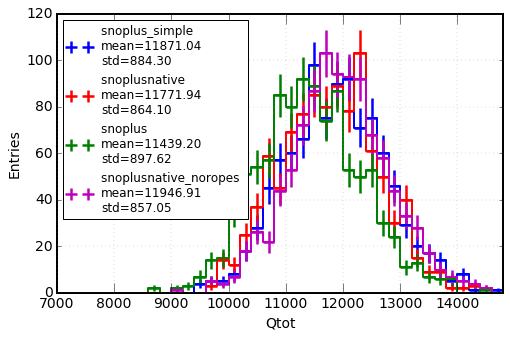

In [27]:
plotComparison(datasets = ['snoplus_simple', 'snoplusnative', 
                           'snoplus', 'snoplusnative_noropes'],
              datakey = 'qtot',
              figname = 'PBomb380_qtot_native_vs_simple',
              xaxis = np.arange(7000,15000,200),
              xlabel = 'Qtot',
              ylabel = 'Entries')


snoplus_simple
SUM  11871042.0299
Mean  31.0395426055
Std   33.9662978061

snoplusnative
SUM  11771935.6127
Mean  31.0712557974
Std   33.9547223716

snoplus
SUM  11439201.2772
Mean  31.0994907297
Std   34.083839945

snoplusnative_noropes
SUM  11946912.4053
Mean  31.0892437383
Std   33.9081844975


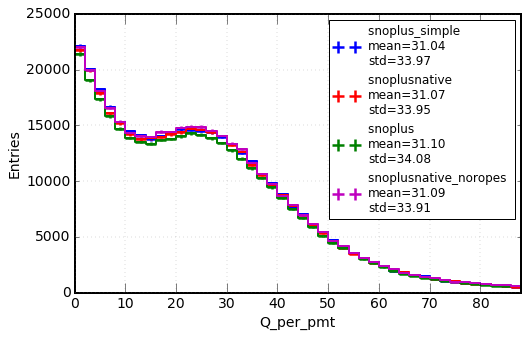

In [28]:
plotComparison(datasets = ['snoplus_simple', 'snoplusnative', 
                           'snoplus', 'snoplusnative_noropes'],
              datakey = 'qpmt',
              figname = 'PBomb380_qpmt_native_vs_simple',
              xaxis = np.arange(0,90,2),
              xlabel = 'Q_per_pmt',
              ylabel = 'Entries')


snoplus_simple
SUM  382449.0
Mean  1.02103478656
Std   0.145550691911

snoplusnative
SUM  378869.0
Mean  1.02130108608
Std   0.146646139595

snoplus
SUM  367826.0
Mean  1.0206275389
Std   0.143995822041

snoplusnative_noropes
SUM  384278.0
Mean  1.02163284513
Std   0.147153129093


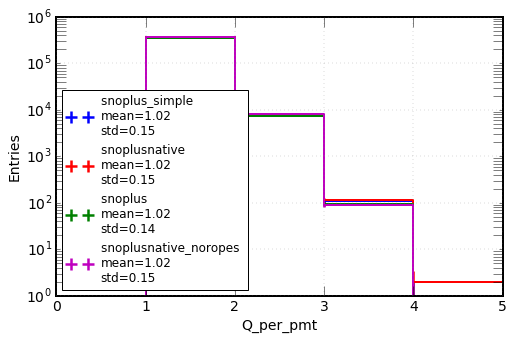

In [29]:
plotComparison(datasets = ['snoplus_simple', 'snoplusnative', 
                           'snoplus', 'snoplusnative_noropes'],
              datakey = 'pexpmt',
              figname = 'PBomb380_pexpmt_native_vs_simple',
              xaxis = np.arange(0,6,1),
              xlabel = 'Q_per_pmt',
              ylabel = 'Entries')
plt.yscale('log')

#### Water comparisons

In [17]:
readFile('snoplus_simple_h2o','pbomb380.root')

In [18]:
readFile('snoplusnative_h2o','pbomb380.root')


snoplus_simple_h2o
SUM  403033.0
Mean  403.033
Std   18.7172089533

snoplusnative_h2o
SUM  392141.0
Mean  392.141
Std   18.7100272314


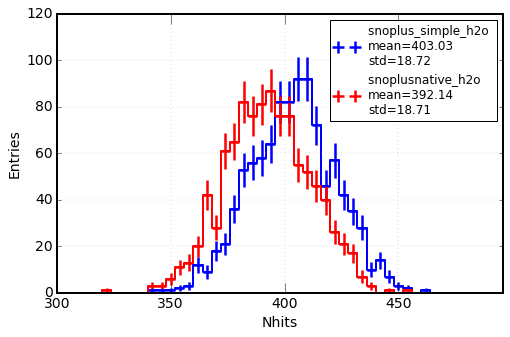

In [32]:
plotComparison(datasets = ['snoplus_simple_h2o', 'snoplusnative_h2o'],
              datakey = 'nhits',
              figname = 'PBomb380_nhit_native_vs_simple_water',
              xaxis = np.arange(300,500,4),
              xlabel = 'Nhits',
              ylabel = 'Entries')


snoplus_simple_h2o
SUM  12797321.5902
Mean  12797.3215902
Std   936.279759872

snoplusnative_h2o
SUM  12463021.7845
Mean  12463.0217845
Std   900.704137233


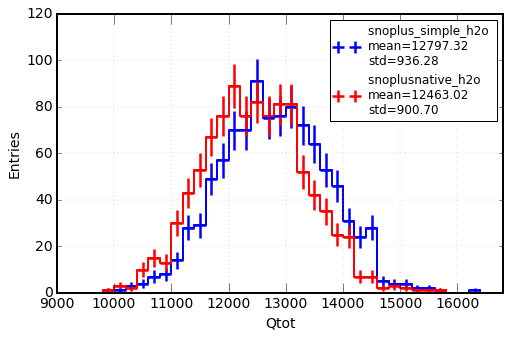

In [34]:
plotComparison(datasets = ['snoplus_simple_h2o', 'snoplusnative_h2o'],
              datakey = 'qtot',
              figname = 'PBomb380_qtot_native_vs_simple_water',
              xaxis = np.arange(9000,17000,200),
              xlabel = 'Qtot',
              ylabel = 'Entries')


snoplus_simple_h2o
SUM  12797321.5902
Mean  31.0342675233
Std   33.8965986232

snoplusnative_h2o
SUM  12463021.7845
Mean  31.0755151013
Std   33.9292421537


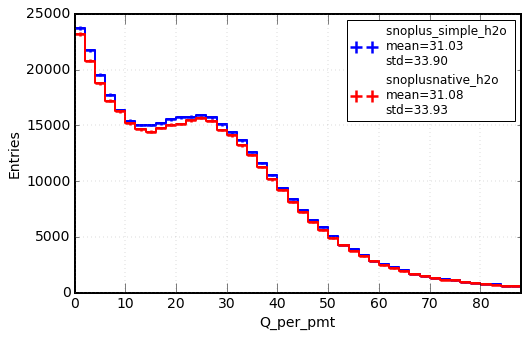

In [21]:
plotComparison(datasets = ['snoplus_simple_h2o', 'snoplusnative_h2o'],
              datakey = 'qpmt',
              figname = 'PBomb380_qpmt_native_vs_simple_water',
              xaxis = np.arange(0,90,2),
              xlabel = 'Q_per_pmt',
              ylabel = 'Entries')